**import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**read data**

In [2]:
data= pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv' )

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# get number of data missing 
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# get customer churn count   
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

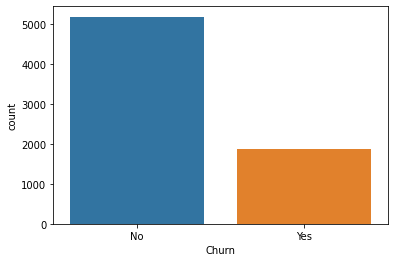

In [10]:
#visualize the count of customer churn
sns.countplot(data['Churn'])

In [11]:
#what is the percentage of customers that are leaving ?
num_retained =data[data.Churn=='No'].shape[0]
num_churned=data[data.Churn=='Yes'].shape[0]

#print the percentage of customer that stayed 
print (num_retained /(num_retained + num_churned )*100,'% of customers stayed with the company.')

#print the percentage of customer that left
print (num_churned/(num_retained + num_churned )*100,'%  of customers left with the company .')



73.4630129206304 % of customers stayed with the company.
26.536987079369588 %  of customers left with the company .


<AxesSubplot:xlabel='gender', ylabel='count'>

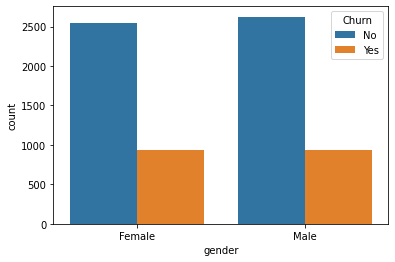

In [12]:
#visualalize the churn count for both males and females
sns.countplot(x='gender',hue='Churn',data=data)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

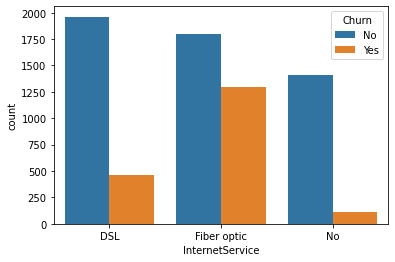

In [13]:
#visualalize the churn count for the internet service
sns.countplot(x='InternetService',hue='Churn',data=data)

<AxesSubplot:xlabel='Contract', ylabel='count'>

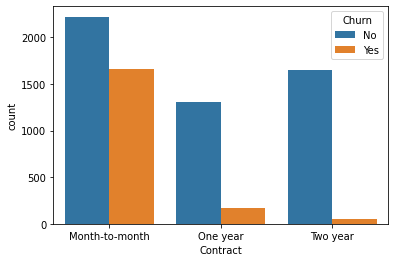

In [14]:
sns.countplot(x='Contract', data=data, hue='Churn')

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

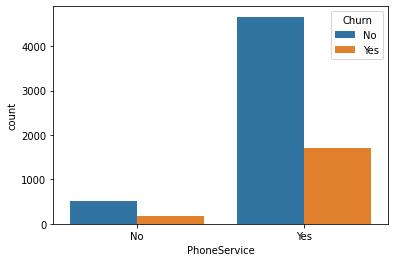

In [15]:
sns.countplot(x='PhoneService', data=data, hue='Churn')

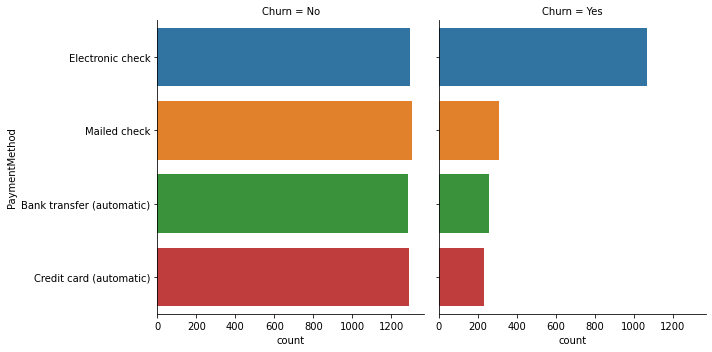

In [16]:
sns.catplot(data=data, y='PaymentMethod', col='Churn', kind='count')

In [17]:
display(data.groupby('PaymentMethod').agg({'MonthlyCharges': 'mean'}))
data.groupby('PaymentMethod').agg({'MonthlyCharges': 'median'})

,MonthlyCharges
PaymentMethod,
Bank transfer (automatic),67.192649
Credit card (automatic),66.512385
Electronic check,76.255814
Mailed check,43.917060


,MonthlyCharges
PaymentMethod,
Bank transfer (automatic),73.100
Credit card (automatic),73.025
Electronic check,80.550
Mailed check,34.700


([<matplotlib.patches.Wedge at 0x7fabf6c31790>,
 [Text(-0.8144539368428058, -0.7393678277834755, 'Not Churned'),
  Text(0.8144540060674139, 0.7393677515287918, 'Churned')],
 [Text(-0.44424760191425766, -0.40329154242735027, '73.463'),
  Text(0.4442476396731348, 0.4032915008338864, '26.537')])

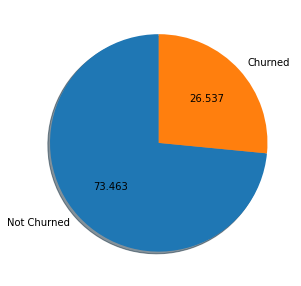

In [18]:
plt.figure(figsize=(5,5))
plt.pie(data["Churn"].value_counts(), startangle=90,autopct='%.3f',labels=['Not Churned','Churned'],shadow=True)